# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science 



## Homework 6: Multilayer Feedforward Network - Dealing with Missing Data


**Harvard University**<br/>
**Fall 2018**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader

<hr style="height:2pt">

In [1]:
#RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

### INSTRUCTIONS

- To submit your assignment follow the [instructions given in canvas](https://canvas.harvard.edu/courses/42693/pages/homework-policies-and-submission-instructions).

- This homework can be submitted in pairs.

- If you submit individually but you have worked with someone, please include the name of your **one** partner below. 


**Names of person you have worked with goes here:** Haoran Zhao, Xi Han

In [2]:
%matplotlib inline
import numpy as np
import numpy.random as nd
import pandas as pd
import math
import matplotlib.pyplot as plt

import os
import seaborn as sns
sns.set(style="darkgrid")

from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import Imputer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from IPython.display import display

<div class="theme"> Overview </div>

In this homework, you are free to explore different ways of solving the problems -within the restrictions of the questions. Your solutions should read like a report with figures to support your statements. Please include your code cells as usual but augment your solutions with written answers. We will also check for code readability and efficiency as we feel you have some experience now. In particular, for Q1, we expect you to write appropriate functions, such as your code can be generalized beyond the specified network architectures of his homework.

For this homework you may **not** use a machine learning library such as `keras` or `tensorflow` to build and fit the network. The objective is to build the network equations from scratch.

- Q1 explores approximating a function using a **Multilayer Feedforward Network** with one input layer, one hidden layer, and one output layer. 

- Q2 deals with missing data in a medical dataset.

<div class="exercise"> <b> Question 1: Construct a feed forward neural network [50 pts]</b> </div>
    
In this part of the homework you are to construct three feed forward neural networks consisting of an input layer, one hidden layer with 1, 2 and 4 nodes respectively, and an output layer.  The hidden layer uses the sigmoid as the activation function and use a linear  output node. 
You should code the equations from scratch. 

You are given three datasets containing ($x,y$) points where $y=f(x)$:

- In the first dataset, $f(x)$ is a **single step** function (data in`data/step_df.csv`), 
- In the second dataset, $f(x)$ is a **one hump** function (data in `data/one_hump_df.csv`),
- In the third dataset, $f(x)$ is a **two equal humps** function (data in `data/two_hump_df.csv`).

**1.1** Create a plot of each dataset and explore the structure of the data. 

**1.2**  Give values to the weights **manually**, perform a forward pass using the data for the **single step** function and a hidden layer of **one** node, and plot the output from the network, in the same plot as the true $y$ values. Adjust the weigths (again manualy) until the plots match as closely as possible.

**1.3** Do the same for the **one hump** function data, this time using a hidden layer consisting of **two** nodes.

**1.4** Do the same for the **two hump** function data but this time increase the number of hidden nodes to **four**.  

**1.5** Choose the appropriate loss function and calculate and report the loss from all three cases. Derive the gradient of the output layer's weights for all three cases (step, one hump and two humps). Use the weights for the hidden layers you found in the previous question and perform gradient descent on the weights of this layer (output layer). What is the optimised weight value and loss you obtained? How many steps did you take to reach this value? What is the threshold value you used to stop? 

### Answers

**1.1** Create a plot of each dataset and explore the structure of the data. 
 

(100, 2)


,x,y
0,-2.762886,0.000706
1,1.108371,-0.000376
2,-0.793581,-0.002845
3,-3.666329,-0.000031
4,8.805071,1.001807


Text(0.5,1,'Single Step Function')

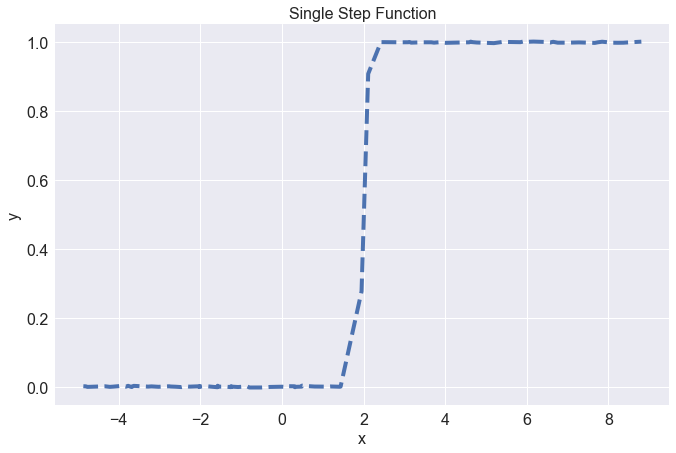

In [3]:
# First dataset: single step function
df_1step = pd.read_csv("data/step_df.csv")

print(df_1step.shape)
display(df_1step.head())

df_1step = df_1step.sort_values(by='x')
plt.figure(figsize=(11,7))
plt.plot(df_1step.x, df_1step.y, '--', lw=4)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.tick_params(labelsize=16)
plt.title('Single Step Function', fontsize=16)

One step function in the dataset starts from 0, and jumps quickly to 1 at x=2.

(100, 2)


,x,y
0,3.734197,1.000226
1,6.890217,-0.000877
2,3.330365,0.999072
3,-4.250132,-0.000071
4,3.700311,1.002423


Text(0.5,1,'One Hump Function')

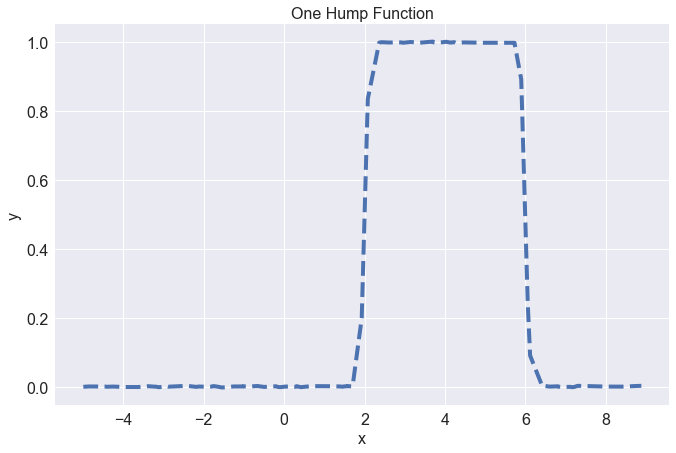

In [4]:
# Second dataset: one hump function
df_1hump = pd.read_csv("data/one_hump_df.csv")

print(df_1hump.shape)
display(df_1hump.head())

df_1hump = df_1hump.sort_values(by='x')
plt.figure(figsize=(11,7))
plt.plot(df_1hump.x, df_1hump.y, '--', lw=4)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.tick_params(labelsize=16)
plt.title('One Hump Function', fontsize=16)

One hump function starts from 0, jumps quickly to 1 at x = 2, and then stays there till x = 6, at which point drops down to 0 again.

(100, 2)


,x,y
0,-2.637720,0.000288
1,3.808384,0.000326
2,3.121579,0.080294
3,5.713059,1.000351
4,3.975868,0.000362


Text(0.5,1,'Two Equal Humps Function')

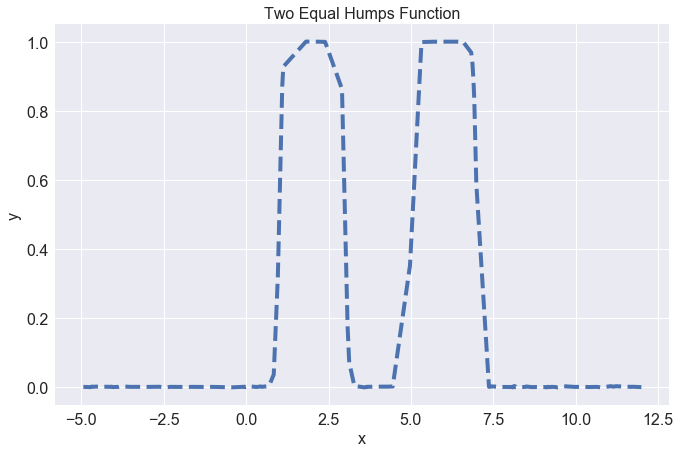

In [5]:
# Third dataset: two equal humps function
df_2hump = pd.read_csv("data/two_hump_df.csv")

print(df_2hump.shape)
display(df_2hump.head())

df_2hump = df_2hump.sort_values(by='x')
plt.figure(figsize=(11,7))
plt.plot(df_2hump.x, df_2hump.y, '--', lw=4)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.tick_params(labelsize=16)
plt.title('Two Equal Humps Function', fontsize=16)

Two equal humps function is just one extra hump vs one hump function. 

**1.2**  Give values to the weights **manually**, perform a forward pass using the data for the **single step** function and a hidden layer of **one** node, and plot the output from the network, in the same plot as the true $y$ values. Adjust the weigths (again manualy) until the plots match as closely as possible.


In [36]:
def sigmoid(x: float) -> float :    
    return (1/(1 + np.exp(-x))) 

In [37]:
def forward_step(X_in: np.ndarray, WL_0: np.ndarray, 
                 WL_1: np.ndarray, y_out: np.ndarray):
    """Network is 
        input layer X_in
        hidden layer z0 = activation(X_in _dot_ WL_0))
        output layer z1 = z0 _dot_ WL_1 
        
        We have two sets of weights, WL_0 and WL_1
        Not necessary to return both z0 and z1 for this question 
        but we need both for 1.5 part
    """    
    # input layer is the actual X input with the addition of a constant 1
    ones = np.ones((len(X_in),1))    
    L0 = X_in 
    L0 = np.append(L0, ones, axis=1)
    
    # hidden layer
    a0 = np.dot(WL_0, L0.T)
    z0 = sigmoid(a0)
    
    # output layer - prepare z0 to be the input to the linear function
    ones = np.ones((len(y_out),1))
    z0 = np.append(z0.reshape(-1,1), ones,axis=1).T
    
    # affine
    a1 = np.dot(WL_1, z0)
    z1 = a1 # output layer is the linear tranformation
    
    return z1, z0

In [42]:
# ONE STEP - one node in hidden layer 

# Input 
X = df_1step['x'].values.reshape(-1,1)
y = df_1step['y'].values

c = 2
b1 = 20
b0 = -c*b1
WL0 = np.array([b1, b0])
WL1 = np.array([1, 0]) # height of each step for linear output

# forward pass
z1, z0 = forward_step(X, WL0, WL1, y)

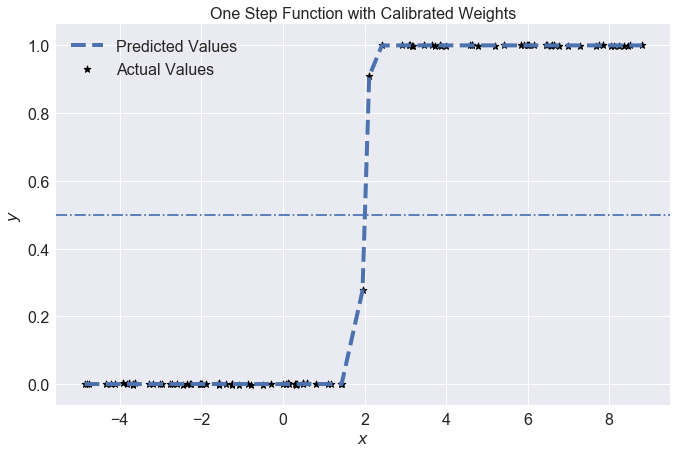

In [43]:
fig, ax = plt.subplots(1, 1, figsize=(11, 7))

ax.scatter(df_1step['x'].values, df_1step['y'].values, color='k', marker='*', lw=1, label='Actual Values')
ax.plot(X, z1.T, '--', lw=4, label='Predicted Values')
ax.axhline(y=0.5, linestyle='-.')

ax.set_title('One Step Function with Calibrated Weights', fontsize=16)
ax.set_xlabel('$x$', fontsize=16)
ax.set_ylabel('$y$', fontsize=16)
ax.tick_params(labelsize=16)
ax.legend(fontsize=16, loc='best')

**1.3** Do the same for the **one hump** function data, this time using a hidden layer consisting of **two** nodes.


In [46]:
def forward_onehump(X_in: np.ndarray, WL_0: np.ndarray, 
                    WL_1: np.ndarray, y_out: np.ndarray):
    
    # input layer
    ones = np.ones((len(X_in),1))    
    L0 = X_in 
    L0 = np.append(L0, ones, axis=1)

    # hidden layer
    a0 = np.dot(WL_0, L0.T)
    z0 = sigmoid(a0)

    # output layer 
    ones = np.ones((len(y_out),1))
    z0 = np.append(z0.T, ones,axis=1).T
    
    # affine
    a1 = np.dot(WL_1, z0)
    z1 = a1 
    
    return z1, z0 

In [49]:
# your code here
# ONE HUMP  - two nodes in hidden layer

# input 
X = df_1hump['x'].values.reshape(-1,1)
Y = df_1hump['y'].values

c1 = 2
b11 = 20
b10 = -c1*b11
c2 = 6
b21 = -20
b20 = -c2*b21

WL0 =np.array([[b11,b10], [b21,b20]])
WL1 = np.array([[1, 1, -1]]) # height of each step

# forward pass
z1, z0 = forward_onehump(X, WL0, WL1, y)

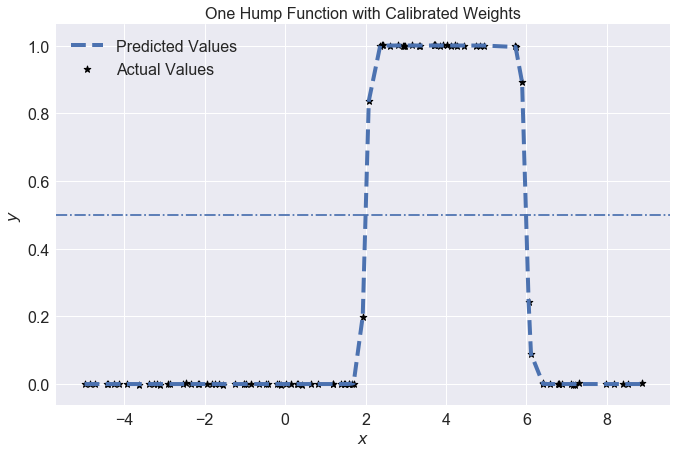

In [50]:
fig, ax = plt.subplots(1, 1, figsize=(11, 7))

ax.scatter(df_1hump['x'].values, df_1hump['y'].values, color='k', marker='*', lw=1, label='Actual Values')
ax.plot(X, z1.T, '--', lw=4, label='Predicted Values')
ax.axhline(y=0.5, linestyle='-.')

ax.set_title('One Hump Function with Calibrated Weights', fontsize=16)
ax.set_xlabel('$x$', fontsize=16)
ax.set_ylabel('$y$', fontsize=16)
ax.tick_params(labelsize=16)
ax.legend(fontsize=16, loc='best')

**1.4** Do the same for the **two hump** function data but this time increase the number of hidden nodes to **four**.  


In [51]:
def forward_twohump(X_in: np.ndarray, WL_0: np.ndarray, 
                    WL_1: np.ndarray, y_out: np.ndarray):
    
    #input layer
    ones = np.ones((len(X_in),1))    
    L0 = X_in 
    L0 = np.append(L0, ones, axis=1)

    #hidden layer
    a0 = np.dot(WL_0, L0.T)
    z0 = sigmoid(a0)

    #output layer 
    ones = np.ones((len(y_out),1))
    z0 = np.append(z0.T, ones,axis=1).T

    #affine
    a1 = np.dot(WL_1, z0)
    z1 = a1 
    
    return z1, z0 

In [56]:
# your code here
# TWO HUMPS  - four nodes in hidden layer 

# input 
X = df_2hump['x'].values.reshape(-1,1)
y = df_2hump['y'].values

c1 = 1
b11 = 20
b10 = -c1*b11

c2 = 3
b21 = -20
b20 = -c2*b21

c3 = 5
b31 = 20
b30 = -c3*b31

c4 = 7
b41 = -20
b40 = -c4*b41

WL0 = np.array([[b11,b10], [b21,b20], [b31,b30], [b41,b40]])
WL1 = np.array([[1, 1, 1, 1, -2]]) # height of each step

# forward pass
z1, z0 = forward_twohump(X, WL0, WL1, y)

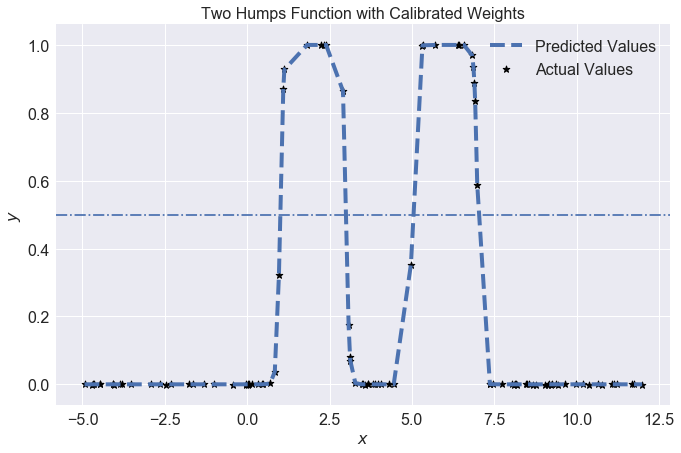

In [57]:
fig, ax = plt.subplots(1, 1, figsize=(11, 7))

ax.scatter(df_2hump['x'].values, df_2hump['y'].values, color='k', marker='*', lw=1, label='Actual Values')
ax.plot(X, z1.T, '--', lw=4, label='Predicted Values')
ax.axhline(y=0.5, linestyle='-.')

ax.set_title('Two Humps Function with Calibrated Weights', fontsize=16)
ax.set_xlabel('$x$', fontsize=16)
ax.set_ylabel('$y$', fontsize=16)
ax.tick_params(labelsize=16)
ax.legend(fontsize=16, loc='best')

**1.5** Choose the appropriate loss function and calculate and report the loss from all three cases. Derive the gradient of the output layer's weights for all three cases (step, one hump and two humps). Use the weights for the hidden layers you found in the previous question and perform gradient descent on the weights of this layer (output layer). What is the optimised weight value and loss you obtained? How many steps did you take to reach this value? What is the threshold value you used to stop? 

In [66]:
# Our loss function is MSE
def L(y_pred, y):
    return np.mean(np.square(y_pred - y))

def der_L_WL1(WL1, z0, y_pred, y):
    ders = 2*np.dot(z0, (y_pred - y).T)/len(y)
    ders = ders.reshape(1,ders.shape[0])
    return ders # returns vector of partial derivatives

def gradient_descent(steps, lr, WL0, WL1, X, y, fn):
    # forward pass
    z1, z0 = fn(X, WL0, WL1, y)

    # starting gradient descent here
    WL1_n_minus_1 = WL1
    L_min = L(z1,y)
    errors = [L_min]

    l = lr # learning rate
    num_steps = steps

    for i in range(num_steps):
        gradient_eval = der_L_WL1(WL1_n_minus_1, z0, z1, y) # evaluating gradient at WL1_(n-1),
        WL1_n = WL1_n_minus_1 - l*gradient_eval # updating approximation of WL1
        z1, z0 = fn(X, WL0, WL1_n, y) # evaluating function at new point
        error = L(z1, y) # finding error in approximation

        errors.append(error) # storing values of error
        WL1_n_minus_1 = WL1_n # x_n is the previous step now
    
    return z1, WL1_n, errors

#### a) step function NN (a hidden layer with a single node)

In [90]:
# values from above
X = df_1step['x'].values.reshape(-1,1)
y = df_1step['y'].values

c = 2
b1 = 20
b0 = -c*b1
WL0 = np.array([b1,b0])
WL1 = np.array([1,20]) # starting weights

l = 0.01 # learning rate
num_steps = 10000

z1_new, WL1_new, errors = gradient_descent(num_steps, l, WL0, WL1, X, y, forward_step)
print(WL1_new)

[[ 1.00003863e+00 -4.21704204e-05]]


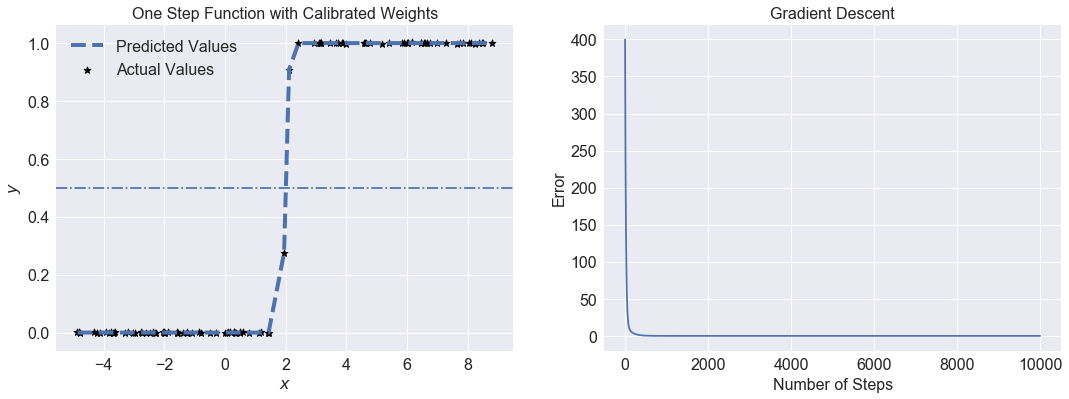

In [91]:
figure, ax = plt.subplots(1, 2, figsize=(18,6))
ax[0].scatter(X, y, color='k', marker='*', lw=1, label='Actual Values')
ax[0].plot(X, z1_new.T, '--', lw=4, label='Predicted Values')
ax[0].axhline(y=0.5, linestyle='-.')

ax[0].set_title('One Step Function with Calibrated Weights', fontsize=16)
ax[0].set_xlabel('$x$', fontsize=16)
ax[0].set_ylabel('$y$', fontsize=16)
ax[0].tick_params(labelsize=16)
ax[0].legend(fontsize=16, loc='best')

ax[1].plot(range(num_steps+1), errors)
ax[1].set_title('Gradient Descent', fontsize=16)
ax[1].set_xlabel('Number of Steps', fontsize=16)
ax[1].set_ylabel('Error', fontsize=16)
ax[1].tick_params(labelsize=16)

#### b) one hump function NN (a hidden layer with two nodes)

In [108]:
# ONE HUMP
# values from above
X = df_1hump['x'].values.reshape(-1,1)
y = df_1hump['y'].values

c1 = 2
b11 = 20
b10 = -c1*b11
c2 = 6
b21 = -20
b20 = -c2*b21

WL0 = np.array([[b11,b10], [b21,b20]])
# WL1 = np.array([[1, 1, -1]])
WL1 = np.array([[5, 10, -100]]) # Starting Point

l = 0.01 # learning rate
num_steps = 10000

z1_new, WL1_new, errors = gradient_descent(num_steps, l, WL0, WL1, X, y, forward_onehump)
print(WL1_new)

[[ 1.00372318  1.00600748 -1.00694669]]


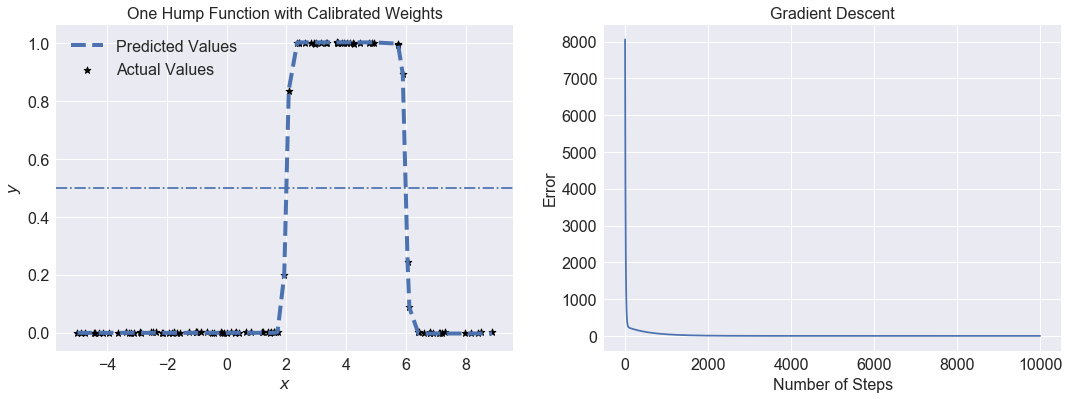

In [110]:
figure, ax = plt.subplots(1, 2, figsize=(18,6))
ax[0].scatter(X, y, color='k', marker='*', lw=1, label='Actual Values')
ax[0].plot(X, z1_new.T, '--', lw=4, label='Predicted Values')
ax[0].axhline(y=0.5, linestyle='-.')

ax[0].set_title('One Hump Function with Calibrated Weights', fontsize=16)
ax[0].set_xlabel('$x$', fontsize=16)
ax[0].set_ylabel('$y$', fontsize=16)
ax[0].tick_params(labelsize=16)
ax[0].legend(fontsize=16, loc='best')

ax[1].plot(range(num_steps+1), errors)
ax[1].set_title('Gradient Descent', fontsize=16)
ax[1].set_xlabel('Number of Steps', fontsize=16)
ax[1].set_ylabel('Error', fontsize=16)
ax[1].tick_params(labelsize=16)

#### c) two hump function NN (a hidden layer with 4 nodes)

In [132]:
# your code here
# TWO HUMPS  - four nodes in hidden layer 

# input 
X = df_2hump['x'].values.reshape(-1,1)
y = df_2hump['y'].values

c1 = 1
b11 = 20
b10 = -c1*b11

c2 = 3
b21 = -20
b20 = -c2*b21

c3 = 5
b31 = 20
b30 = -c3*b31

c4 = 7
b41 = -20
b40 = -c4*b41

WL0 = np.array([[b11,b10], [b21,b20], [b31,b30], [b41,b40]])
# WL1 = np.array([[1, 1, 1, 1, -2]]) 
WL1 = np.array([[1, 1, 1, 2, -2]]) # Initial weights

l = 0.01 # learning rate
num_steps = 10000

z1_new, WL1_new, errors = gradient_descent(num_steps, l, WL0, WL1, X, y, forward_twohump)
print(WL1_new)

[[ 1.00579164  1.00743927  1.00538291  1.00366373 -2.01183039]]


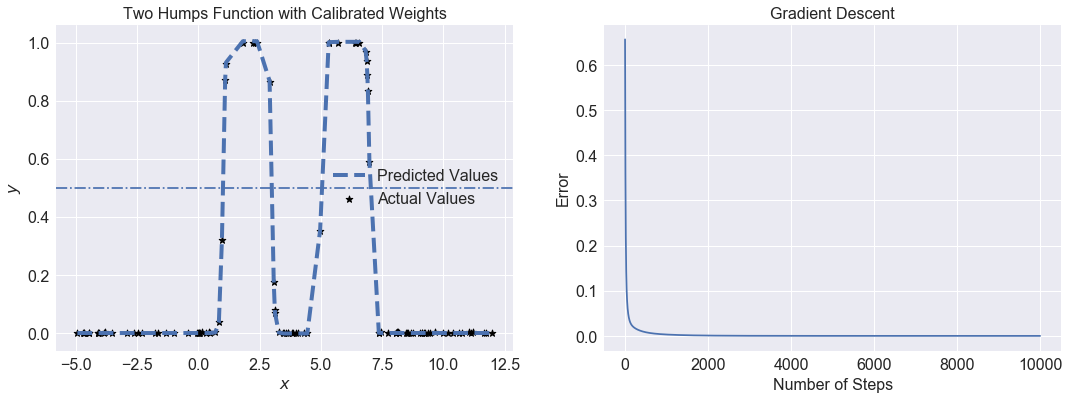

In [133]:
figure, ax = plt.subplots(1, 2, figsize=(18,6))
ax[0].scatter(X, y, color='k', marker='*', lw=1, label='Actual Values')
ax[0].plot(X, z1_new.T, '--', lw=4, label='Predicted Values')
ax[0].axhline(y=0.5, linestyle='-.')

ax[0].set_title('Two Humps Function with Calibrated Weights', fontsize=16)
ax[0].set_xlabel('$x$', fontsize=16)
ax[0].set_ylabel('$y$', fontsize=16)
ax[0].tick_params(labelsize=16)
ax[0].legend(fontsize=16, loc='best')

ax[1].plot(range(num_steps+1), errors)
ax[1].set_title('Gradient Descent', fontsize=16)
ax[1].set_xlabel('Number of Steps', fontsize=16)
ax[1].set_ylabel('Error', fontsize=16)
ax[1].tick_params(labelsize=16)

<div class="exercise"> <b> Question 2: Working with missing data. [50 pts]</b> </div>

In this exercise we are going to use the **Pima Indians onset of diabetes** dataset found in `pima-indians-diabetes.csv`. This dataset describes patient medical record data for Pima Indians and whether they had an onset of diabetes within five years. It is a binary classification problem (onset of diabetes as 1 or not as 0). The input variables that describe each patient are numerical and have varying scales. The list below shows the eight attributes plus the target variable for the dataset:

- Number of times pregnant.
- Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
- Diastolic blood pressure (mm Hg).
- Triceps skin fold thickness (mm).
- 2-Hour serum insulin (mu U/ml).
-  Body mass index.
-  Diabetes pedigree function.
- Age (years).<br>
- **Outcome** (1 for early onset of diabetes within five years, 0 for not), target class.

**2.1**. Load the dataset into a pandas dataframe named `pima_df`. Clean the data by looking at the various features and making sure that their values make sense. Look for missing data including disguised missing data. The problem of disguised missing data arises when missing data values are not explicitly represented as such, but are coded with values that can be misinterpreted as valid data. Comment on your findings.

**2.2** Split the dataset into a 75-25 train-test split (use `random_state=9001`). Fit a logistic regression classifier to the training set and report the  accuracy of the classifier on the test set. You should use $L_2$ regularization in logistic regression, with the regularization parameter tuned using cross-validation (`LogisticRegressionCV`).  Report the overall classification rate.

**2.3** Restart with a fresh copy of the whole dataset and impute the missing data via mean imputation.  Split the data 75-25 (use `random_state=9001`) and fit a regularized logistic regression model.  Report the overall classification rate.  

**2.4** Again restart with a fresh copy of the whole dataset and impute the missing data via a model-based imputation method. Once again split the data 75-25 (same `random_state=9001`) and fit a regularized logistic regression model.  Report the overall classification rate.

**2.5** Compare the results in the 3 previous parts of this problem.  Prepare a paragraph (5-6 sentences) discussing the results, the computational complexity of the methods,  and explain why you get the results that you see.

**2.6** This question does not have one answer and requires some experimentation. Check which coefficients changed the most between the model in 2.1-2.2 and the models in 2.3 and 2.4. Are they the coefficients you expected to change given the imputation you performed? If not explain why (supporting your explanation using the data is always a good idea).


### Answers

**2.1** 

In [21]:
# your code here
pima_df = pd.read_csv("data/pima-indians-diabetes.csv")
print(pima_df.describe())
print(pima_df.dtypes)
columns = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

##remove special character of the outcome 
pima_df['Outcome'] = pima_df.Outcome.str.extract('(\d+)')
pima_df = pima_df[(pd.to_numeric(pima_df.Outcome) == 0) | (pd.to_numeric(pima_df.Outcome) == 1)]

##check if any NA values
print(pima_df.isnull().any().any())


       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   764.000000  764.000000     764.000000     764.000000  764.000000   
mean      3.853403  120.922775      69.111257      20.537958   80.070681   
std       3.374327   32.039835      19.403339      15.970234  115.431087   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   34.000000   
75%       6.000000  141.000000      80.000000      32.000000  128.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age  
count  764.000000                764.000000  764.000000  
mean    31.998429                  0.472712   33.248691  
std      7.899591                  0.331981   11.771901  
min      0.000000                  0.078000   21.000000  
25%     27.300000        

In [22]:
pima_df_clean = pima_df.copy()

pima_df_clean = pima_df_clean[(pima_df_clean.Glucose!=0) & (pima_df_clean.BloodPressure!=0) & \
        (pima_df_clean.SkinThickness !=0) & (pima_df_clean.Insulin!=0) & \
        (pima_df_clean.BMI !=0) & (pima_df_clean.DiabetesPedigreeFunction !=0) ]


print(pima_df_clean.head())
print(pima_df_clean.shape)

    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
3             1       89             66             23       94  28.1   
4             0      137             40             35      168  43.1   
6             3       78             50             32       88  31.0   
8             2      197             70             45      543  30.5   
13            1      189             60             23      846  30.1   

    DiabetesPedigreeFunction  Age Outcome  
3                      0.167   21       0  
4                      2.288   33       1  
6                      0.248   26       1  
8                      0.158   53       1  
13                     0.398   59       1  
(391, 9)


In the outcome column, there are values with special character '\' etc so we use the regex to extract the numberic value and remove the values not in [0,1].

There are no NA values in the dataset but there are 0 values in Glucose, BloodPressure, SkinThickness, Insulin, BMI and DiabetesPedigreeFunction which does not make sense. Therefore, those are disguised missing data.

**2.2** 

In [26]:
# your code here
def evaluate_model(x,y,test_size, random_state):
    X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=test_size, random_state=random_state)
    clf = LogisticRegressionCV().fit(X_train,y_train)
    return X_train, X_test, y_train, y_test, clf


In [27]:
X_train, X_test, y_train, y_test, clf_clean = evaluate_model(pima_df_clean.drop(columns = 'Outcome'),\
                           pima_df_clean[['Outcome']], test_size=0.25, random_state=9001)

print("Accuracy for training data set:",clf_clean.score(X_train,y_train))
print("Accuracy for testing data set:",clf_clean.score(X_test,y_test))


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy for training data set: 0.8225255972696246
Accuracy for testing data set: 0.7040816326530612


**2.3** 

In [28]:
# your code here
#fill mean to the 0 values 
pima_df_mean = pima_df.copy()
imp_mean = Imputer(missing_values=0, strategy='mean')
pima_df_mean[columns] = imp_mean.fit_transform(pima_df_mean[columns])
print(pima_df_mean.shape)

#evaluate the logistic regression results
X_train, X_test, y_train, y_test, clf_mean = evaluate_model(pima_df_mean.drop(columns = 'Outcome'),\
                     pima_df_mean[['Outcome']],test_size=0.25, random_state=9001)
print("Accuracy for training data set:",clf_mean.score(X_train,y_train))
print("Accuracy for testing data set:",clf_mean.score(X_test,y_test))

(764, 9)


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy for training data set: 0.7731239092495636
Accuracy for testing data set: 0.7643979057591623


**2.4** 

In [29]:
# your code here
# We are going to use linear regression to fill the missing vaule

from sklearn.linear_model import LinearRegression

pima_df_model = pima_df.copy()

for col in columns:
    valid_x = pima_df_clean.drop(columns=[col,"Outcome"])
    valid_y = pima_df_clean[col]
    reg = LinearRegression().fit(valid_x, valid_y)
    fill_value = reg.predict(pima_df_model[pd.to_numeric(pima_df_model[col])==0].drop(columns=[col,"Outcome"]))
    fill_value = fill_value + np.random.normal(0,np.sqrt(mean_squared_error(valid_y, reg.predict(valid_x))), size =len(fill_value))    
    pima_df_model.loc[pd.to_numeric(pima_df_model[col])==0,col] = fill_value
    
    

In [30]:
print(pima_df_model.shape)
X_train, X_test, y_train, y_test, clf_model = evaluate_model(pima_df_model.drop(columns = 'Outcome'),\
                           pima_df_model[['Outcome']],test_size=0.25, random_state=9001)
print("Accuracy for training data set:",clf_model.score(X_train,y_train))
print("Accuracy for testing data set:",clf_model.score(X_test,y_test))

(764, 9)


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy for training data set: 0.7818499127399651
Accuracy for testing data set: 0.7643979057591623


**2.5** 

*your answer here*

Simply dropping out the observations with missing data gives the lowest accuracy. Imputations with mean and linear regression are giving similar result but mean is slightly better. Given the low accuracy and limited number of observations, simply dropping out the missing value is not a good in this case. For complexities, dropping out the column is the easiest and impuation with linear regression is most expensive. Therefore, imputation with mean is the best choice. 

**2.6** 

In [31]:
print((pima_df[columns] == 0).astype(int).sum(axis=0))
# corr = pima_df_clean.corr()
# print(corr)
# sns.heatmap(corr, 
#             xticklabels=corr.columns.values,
#             yticklabels=corr.columns.values)

print(X_train.columns.values)
print(clf_mean.coef_/clf_clean.coef_)
print(clf_model.coef_/clf_clean.coef_)
#print((pima_df_model[['SkinThickness','Insulin']]-pima_df_mean[['SkinThickness','Insulin']]).describe())



Glucose            5
BloodPressure     35
SkinThickness    226
Insulin          371
BMI               11
dtype: int64
['Pregnancies' 'Glucose' 'BloodPressure' 'SkinThickness' 'Insulin' 'BMI'
 'DiabetesPedigreeFunction' 'Age']
[[ 3.55184537  0.86904853 -2.03774159  6.47463191  0.34347399  1.26407816
   1.10294512  0.48050033]]
[[ 3.74938066  0.78899339 -2.06536984  5.3765977  -0.68039899  1.12614113
   1.01025444  0.41165269]]


SkinThickness changed the most between 2.2 and 2.3, and between 2.2 and 2.4. This is expected because 226 skinthickness values are missing, more than 1/4 of all the observations. 